# One-hot encoding

In this notebook, we will encode static features with one-hot encoding, using comparatively Scikit-learn, Feature-engine, and Category Encoders.

We will use the online retail dataset, which we prepared in the notebook `02-create-online-retail-II-datasets.ipynb` located in the `01-Create-Datasets` folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv("../Datasets/online_retail_dataset_countries.csv",
                parse_dates=["week"],
                index_col="week",
                )

df.head()

,country,quantity,revenue
week,,,
2009-12-06,Belgium,143,439.1
2009-12-13,Belgium,10,8.5
2009-12-20,Belgium,0,0.0
2009-12-27,Belgium,0,0.0
2010-01-03,Belgium,0,0.0


In [3]:
# Number of countries in the dataset

df["country"].nunique()

6

There are sales recorded in 6 different countries.

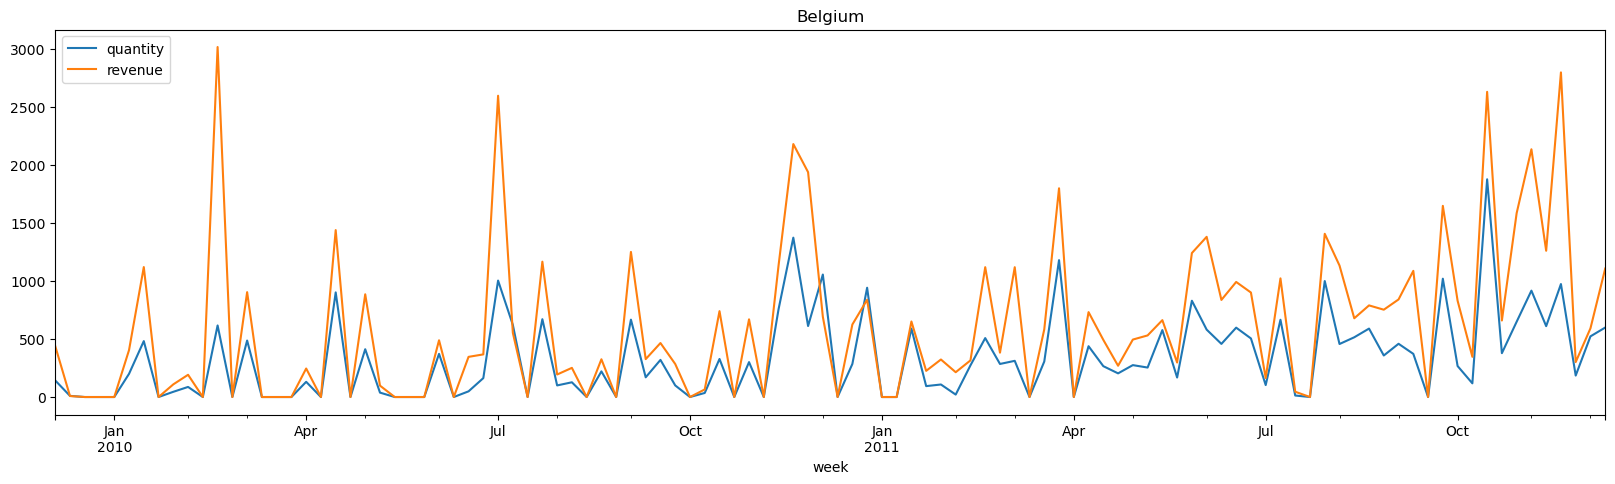

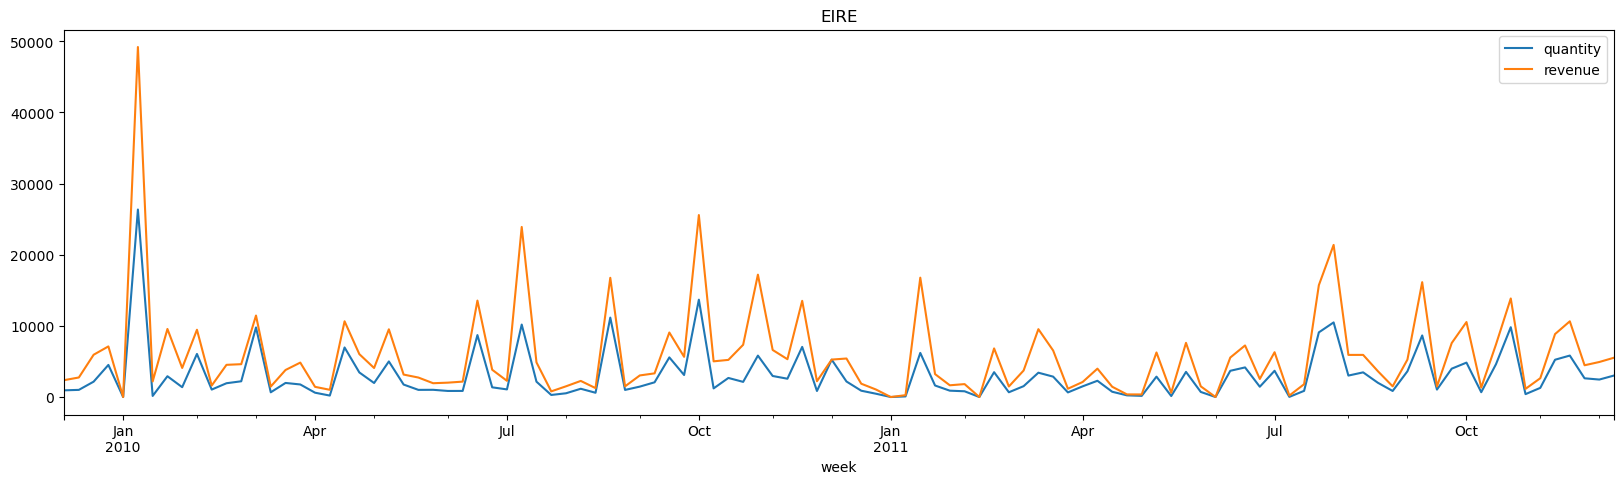

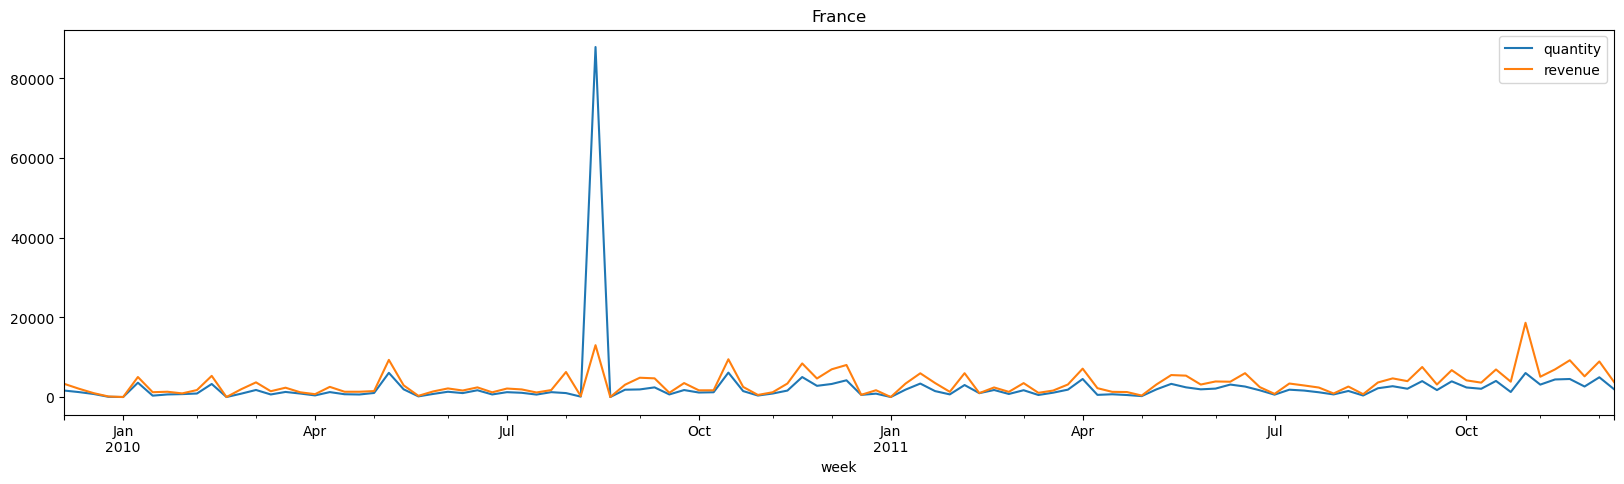

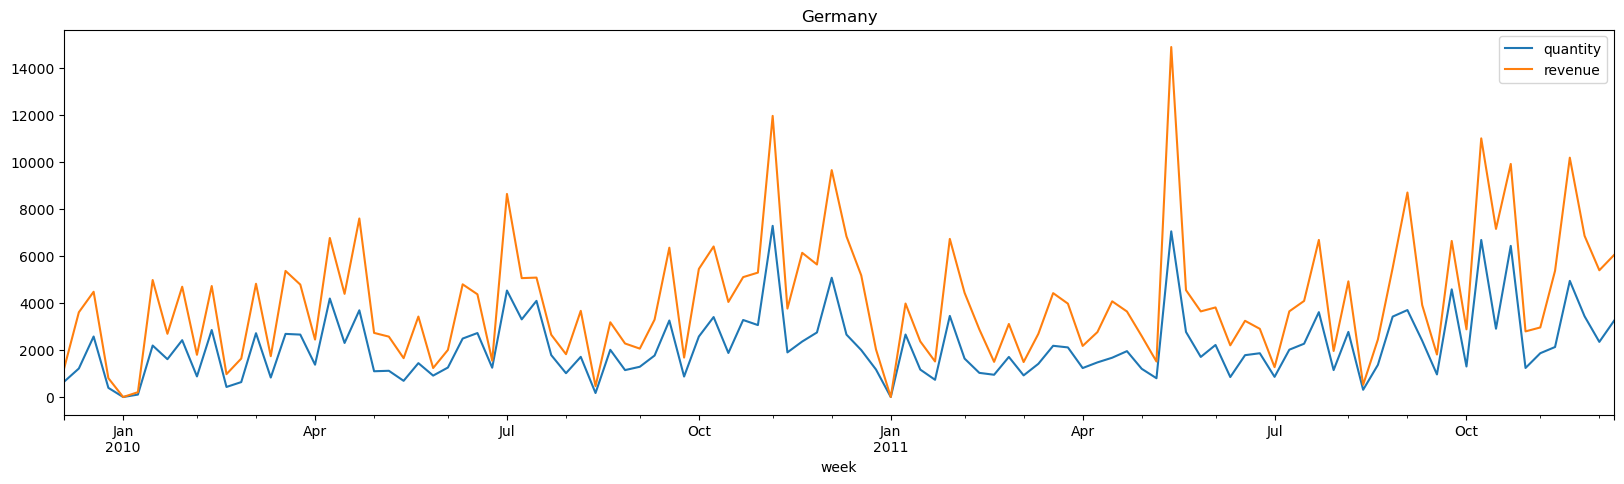

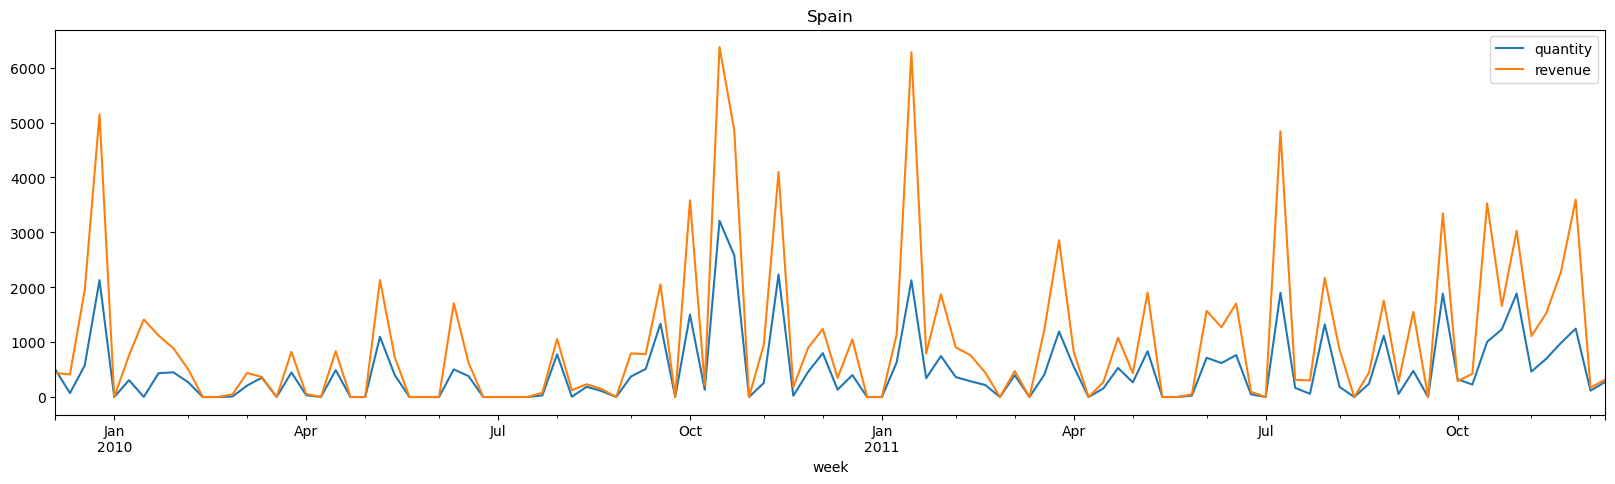

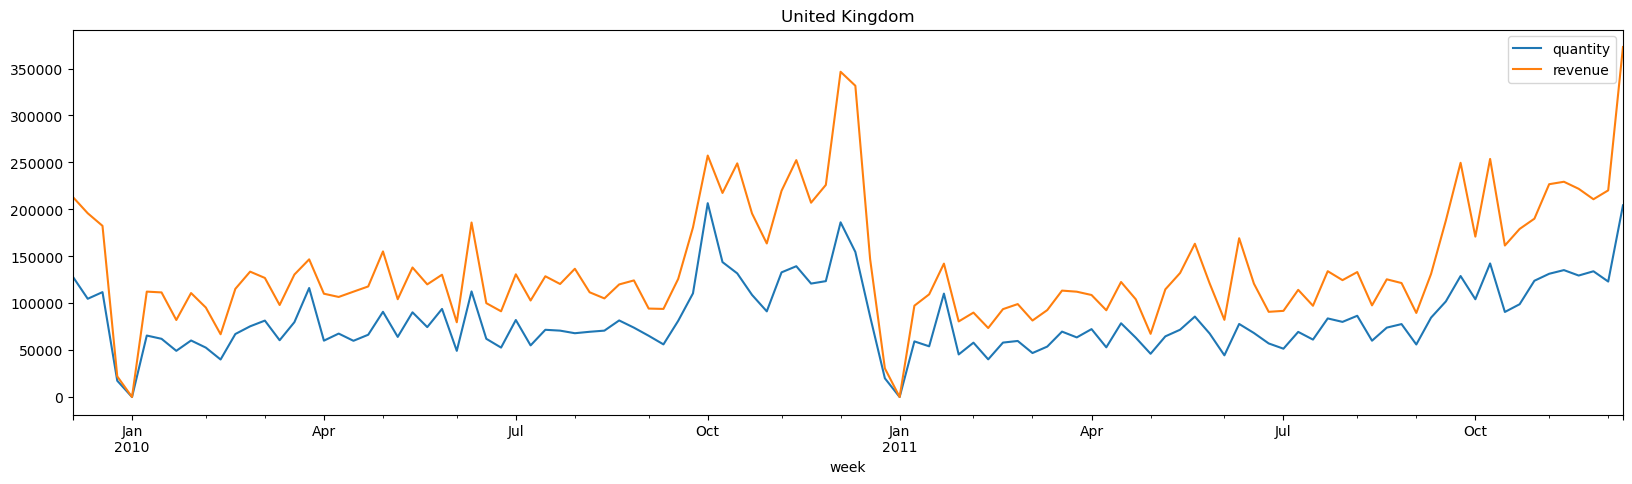

In [4]:
# Plot revenue and quantity of items sold per country
# every week.

for country in df["country"].unique():
    tmp = df[df["country"]==country]
    tmp.plot(figsize=(20,5))
    plt.title(country)
    plt.show()

## Scikit-learn

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
# Set up the one-hot encoder

ohe = OneHotEncoder(

    # to encode into k-1 dummies
    drop="first",  
    
    # to return a np array
    sparse=False,  
    
    # if an unknown category appears in transform,
    # it will be encoded as all zeroes:
    handle_unknown="ignore", 
)

In [7]:
# We place the encoder inside the ColumnTransformer
# to encode only the variable "country".

ct = ColumnTransformer(
    [("ohe", ohe, ["country"])],  # to encode only the variable country
    remainder="passthrough",  # to return all the columns in the resulting array
)

In [8]:
# We should split the data into train and 
# test before fitting. 

# We avoid this step to speed up the demo

ct.fit(df)

c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['country'])])

In [9]:
# Encode country

tmp = ct.transform(df)

# We've got 6 countries, that will return 5 dummies
# after the encoding, plus "revenue" and "quantity" = 7 variables in total

tmp.shape

(636, 7)

In [10]:
# the result is a numpy array

tmp

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.4300000e+02, 4.3910000e+02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+01, 8.5000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.3399800e+05, 2.1074176e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.2304100e+05, 2.2021399e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        2.0428100e+05, 3.7294626e+05]])

In [11]:
# Recreate the dataframe

df_t = pd.DataFrame(tmp, columns = ct.get_feature_names_out())

df_t.head()

,ohe__country_EIRE,ohe__country_France,ohe__country_Germany,ohe__country_Spain,ohe__country_United Kingdom,remainder__quantity,remainder__revenue
0,0.0,0.0,0.0,0.0,0.0,143.0,439.1
1,0.0,0.0,0.0,0.0,0.0,10.0,8.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the variables that were not encoded are added at the right of the dataframe with the predix "remainder".

The encoded variables have the prefix "ohe", followed by the variable being encoded ("country"), followed by the category name.

## Feature-engine

In [12]:
from feature_engine.encoding import OneHotEncoder

In [13]:
# Set up the one-hot encoder

ohe = OneHotEncoder(
    drop_last = True, # to encode into k-1 dummies
)

In [14]:
# We should split the data into train and 
# test before fitting. 

# We avoid this step to speed up the demo

ohe.fit(df)

OneHotEncoder(drop_last=True)

In [15]:
#### Feature-engine's OHE finds categorical variables by default !!! ####

ohe.variables_

['country']

In [16]:
# Feature-engine's OHE replaces the categorical variables
# with the dummies, returning a dataframe with the original 
# and encoded variables, by default.

df_t = ohe.transform(df)

df_t.head()

,quantity,revenue,country_Belgium,country_EIRE,country_France,country_Germany,country_Spain
week,,,,,,,
2009-12-06,143,439.1,1,0,0,0,0
2009-12-13,10,8.5,1,0,0,0,0
2009-12-20,0,0.0,1,0,0,0,0
2009-12-27,0,0.0,1,0,0,0,0
2010-01-03,0,0.0,1,0,0,0,0


## Category Encoders

In [19]:
from category_encoders.one_hot import OneHotEncoder

In [20]:
# Set up the one-hot encoder

# category encoders only encodes into k dummies

ohe = OneHotEncoder(
    use_cat_names=True,  # appends the category name to the dummy variable name
)

In [21]:
# We should split the data into train and 
# test before fitting. 

# We avoid this step to speed up the demo

ohe.fit(df)

OneHotEncoder(cols=['country'], use_cat_names=True)

In [22]:
# Category encoders's OHE finds categorical variables
# by default

ohe.cols

['country']

In [23]:
# Category encoders's OHE replaces the categorical variables
# with the dummies, returning a dataframe with the original 
# and encoded variables, by default.

df_t = ohe.transform(df)

df_t.head()

,country_Belgium,country_EIRE,country_France,country_Germany,country_Spain,country_United Kingdom,quantity,revenue
week,,,,,,,,
2009-12-06,1,0,0,0,0,0,143,439.1
2009-12-13,1,0,0,0,0,0,10,8.5
2009-12-20,1,0,0,0,0,0,0,0.0
2009-12-27,1,0,0,0,0,0,0,0.0
2010-01-03,1,0,0,0,0,0,0,0.0
